In [ ]:
! pip install -U accelerate
! pip install -U transformers
! pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import pandas as pd
import torch

from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast
from scipy.special import expit
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/УИР/intents.csv')
df.head()

,text,label
0,Что ты думаешь о последних событиях? Хотелось ...,Вовлечь в диалог
1,"Мне интересно, как ты видишь эту ситуацию. Мож...",Вовлечь в диалог
2,Давай обсудим наши планы на следующий месяц. Ч...,Вовлечь в диалог
3,"Я заметил, что ты умеешь решать эту проблему. ...",Вовлечь в диалог
4,"Послушай, у меня возникло несколько идей по ул...",Вовлечь в диалог


In [ ]:
labels = df.label.unique()
id = range(23)

labels2id = dict(zip(labels, id))
id2labels = dict(zip(id, labels))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
models = {}
for label in labels:
  models[label] = DistilBertForSequenceClassification.from_pretrained(f'/content/drive/MyDrive/УИР/intent_models/{label}').to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def predict(models, tokenizer, text, labels):
  output = dict()
  for label in labels:
    device = "cuda" if torch.cuda.is_available() else "cpu"
    encoding = tokenizer(text, return_tensors="pt").to(device)
    outputs = models[label](**encoding)
    prob = expit(outputs['logits'].cpu().detach().numpy()).tolist()[0][1]
    output[label] = prob
  return output


Text(0.5, 1.0, 'Мне не понравилось, как прошла предыдущая лекция')

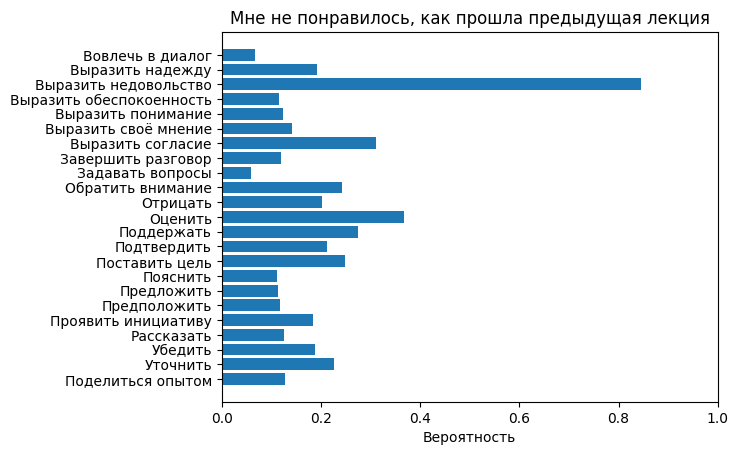

In [ ]:
pred = predict(models, tokenizer, "Мне не понравилось, как прошла предыдущая лекция", labels)
x = list(pred.keys())
y = list(pred.values())
fig, ax = plt.subplots()

ax.barh(x, y, align='center')
ax.set_yticks(x, x)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Вероятность')
ax.set_xlim(0, 1)
ax.set_title("Мне не понравилось, как прошла предыдущая лекция")